# Datenanalyse mit KI & Machine Learning
## Lineare Regression

# Multiple Lineare Regression

Multipel heißt: Wir benutzen mehrere X-Variablen, um unsere y-Variable vorherzusagen.

Beispiel anhand von Pinguinen

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split

In [21]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [22]:
# Gibt es NaN-Werte in unseren Daten?
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [23]:
# Zeilen mit NaNs in den 3 Spalten (Prädiktoren) löschen
penguins.dropna(subset=['bill_depth_mm', 'bill_length_mm', 'flipper_length_mm', 'body_mass_g'], inplace=True)
# Alternativ:
# penguins = penguins.dropna(subset=['bill_depth_mm', 'bill_length_mm', 'flipper_length_mm', 'body_mass_g'])

In [24]:
# Prüfung, ob geklappt:
penguins.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  9
dtype: int64

In [25]:
# Auswahl Parameter:
# X enthält mehrere Variablen.
# y ist Gewicht der Pinguine und soll vorhergesagt werden.
X = penguins.select_dtypes('number').drop('body_mass_g', axis=1)
y = penguins['body_mass_g']

In [26]:
X.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm
0,39.1,18.7,181.0
1,39.5,17.4,186.0
2,40.3,18.0,195.0
4,36.7,19.3,193.0
5,39.3,20.6,190.0


In [27]:
y.head()

0    3750.0
1    3800.0
2    3250.0
4    3450.0
5    3650.0
Name: body_mass_g, dtype: float64

In [28]:
# Daten splitten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Modell trainieren:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
# Die Namen der Variablen:
model.feature_names_in_

array(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'],
      dtype=object)

In [31]:
# Die entsprechenden Koeffizienten:
model.coef_

array([ 4.00878846, 10.92455958, 48.67371868])

In [32]:
# Y-Achsenabschnitt:
model.intercept_

np.float64(-5946.037397381798)

In [33]:
# Welche Koeffizienten haben jetzt die einzelnen Variablen?
print("Namen der Koeffizienten:", model.feature_names_in_)
print("Koeffizienten:", model.coef_)
print("Y-Achsenabschnitt (Schnittpunkt von Gewicht am Nullpunkt aller anderer Variablen):", model.intercept_)

Namen der Koeffizienten: ['bill_length_mm' 'bill_depth_mm' 'flipper_length_mm']
Koeffizienten: [ 4.00878846 10.92455958 48.67371868]
Y-Achsenabschnitt (Schnittpunkt von Gewicht am Nullpunkt aller anderer Variablen): -5946.037397381798


In [34]:
# Gütekriterium: Wie gut beschreibt unser Model die Trainingsdaten?
train_score = model.score(X_train, y_train)
print(f"Güte (R²) für Training: {train_score:.3f}")

Güte (R²) für Training: 0.753


In [35]:
# Gütekriterium: Wie gut beschreibt unser Model die Testdaten?
test_score = model.score(X_test, y_test)
print(f"Güte (R²) für Test: {test_score:.3f}")

Güte (R²) für Test: 0.788


In [36]:
# Größe nur aus einer Variable zur Gegenprüfung:
X_one = penguins[['bill_depth_mm']]
y_one = penguins['body_mass_g']
X_train, X_test, y_train, y_test = train_test_split(X_one, y_one, test_size=0.2, random_state=42)
model = LinearRegression().fit(X_one, y_one)
model_score = model.score(X_test, y_test)
print(f"R² für Test bei einer Variablen: {model_score:.3f}")

R² für Test bei einer Variablen: 0.208


In [37]:
# Größe nur aus einer Variable zur Gegenprüfung:
X_one = penguins[['flipper_length_mm']]
y_one = penguins['body_mass_g']
X_train, X_test, y_train, y_test = train_test_split(X_one, y_one, test_size=0.2, random_state=42)
model = LinearRegression().fit(X_one, y_one)
model_score = model.score(X_test, y_test)
print(f"R² für Test bei einer Variablen: {model_score:.3f}")

R² für Test bei einer Variablen: 0.784


In [38]:
# Zurück zu unserem eigentlichen Modell
X = penguins.select_dtypes('number').drop('body_mass_g', axis=1)
y = penguins['body_mass_g']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [39]:
# Ein Blick hinter die Kulissen. Was macht eigentlich unser Modell?
# Vorhersage des Körpergewichts der Testdaten mittels Modell:
predictions = model.predict(X_test)
predictions

array([4570.38194641, 4113.51389987, 3735.52927583, 3986.01285768,
       3911.62190561, 4505.5323997 , 4281.88723   , 3731.10781455,
       5233.08667221, 3327.20673976, 4110.35606241, 4868.03656231,
       4572.31600353, 4872.61739747, 4024.34897364, 4007.47979765,
       3621.25344604, 3884.11128931, 3101.51665906, 3445.61644874,
       3820.18682019, 3454.79681872, 4703.54448574, 3488.96856185,
       3662.31046665, 4394.57066507, 4023.43147504, 3736.24890243,
       3795.95357177, 5207.03889708, 4192.16205105, 3255.54225267,
       3375.5499167 , 4741.90553501, 3922.76682634, 3214.30471437,
       4292.67667569, 4761.90028399, 3755.21218273, 3370.99022535,
       3883.9955484 , 3805.95684325, 5134.27639369, 4544.83967037,
       3123.36198872, 3962.12885066, 5275.31583572, 5381.693619  ,
       3635.46093383, 3876.97515703, 4613.55354183, 3508.76164933,
       4618.54460567, 3800.63523767, 3342.65670755, 3566.68986459,
       3191.57415058, 5644.59509523, 5575.65707312, 3284.90723

In [40]:
y_test_arr = y_test.values
y_test_arr

array([4800., 3775., 3900., 4400., 4300., 4300., 4300., 3700., 5750.,
       3550., 4000., 5400., 4600., 5300., 3825., 3900., 3325., 3450.,
       3250., 3300., 3600., 3550., 4750., 3150., 4250., 4300., 4775.,
       3400., 3400., 4875., 3400., 3150., 3550., 4950., 4000., 3625.,
       3800., 4650., 4600., 3900., 3550., 3450., 5400., 5350., 2975.,
       3500., 5550., 5400., 3700., 3325., 4400., 3350., 4200., 4200.,
       2850., 3250., 2850., 5850., 5800., 3425., 4650., 5500., 4850.,
       5850., 2900., 4150., 3700., 4500., 4100.])

In [41]:
massen_frame = pd.DataFrame({'true_mass': y_test_arr, 'predicted_mass': predictions})
massen_frame.head()

,true_mass,predicted_mass
0,4800.0,4570.381946
1,3775.0,4113.513900
2,3900.0,3735.529276
3,4400.0,3986.012858
4,4300.0,3911.621906


In [42]:
min_mass = penguins.body_mass_g.min()
min_mass

np.float64(2700.0)

In [43]:
max_mass = penguins.body_mass_g.max()
max_mass

np.float64(6300.0)

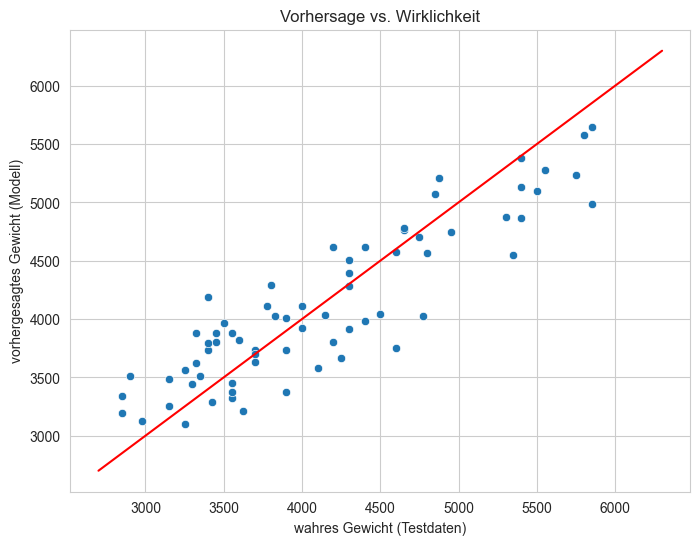

In [44]:
# Vorhersagen unseres Modells visuell mit tatsächlichem Gewicht unserer Pinguine vergleichen:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=predictions)
plt.plot([min_mass, max_mass], [min_mass, max_mass], color='red')
plt.xlabel('wahres Gewicht (Testdaten)')
plt.ylabel('vorhergesagtes Gewicht (Modell)')
plt.title('Vorhersage vs. Wirklichkeit')
plt.show()

# Übungsaufgabe: 20 Minuten

### Lade den Datensatz house_prices.csv. Wende mit sklearn eine multiple lineare Regression auf die Daten an und entwickle ein Modell, mit dem du den median_house_value vorhersagen kannst. Nutze als unabhängige Variablen die Spalten median_income, population, total_bedrooms, total_rooms und housing_median_age.

### Wie gut ist dein Modell? Was sagt der R²-Wert?

### Was wäre der median_house_value für eine Gegend mit einem median_income von 4, einer population von 1000, einer Anzahl an total_bedrooms von 300, einer Anzahl an total_rooms von 1500, und einem housing_median_age von 50?

In [45]:
data = pd.read_csv("house_prices.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [46]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [47]:
data.dropna(subset=["total_bedrooms"], inplace=True)

In [48]:
X = data[["median_income", "population", "total_bedrooms", "total_rooms", "housing_median_age"]]
y = data["median_house_value"]

In [49]:
X.head()

,median_income,population,total_bedrooms,total_rooms,housing_median_age
0,8.3252,322.0,129.0,880.0,41.0
1,8.3014,2401.0,1106.0,7099.0,21.0
2,7.2574,496.0,190.0,1467.0,52.0
3,5.6431,558.0,235.0,1274.0,52.0
4,3.8462,565.0,280.0,1627.0,52.0


In [50]:
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [52]:
train_score = model.score(X_train, y_train)
print(f"R² Train Score: {train_score:.3f}")

R² Train Score: 0.561


In [53]:
test_score = model.score(X_test, y_test)
print(f"R² Test Score: {test_score:.3f}")

R² Test Score: 0.564


In [54]:
X_pred = model.predict(X_test)
print(X_pred)

[164145.17236867 170233.91491971 195689.11271989 ... 114616.3161136
 173635.19799753 143860.03058048]


In [55]:
sim_values = [[4, 1000, 300, 1500, 50]]
sim_pred = model.predict(sim_values)[0]
print(f"Prediction: {sim_pred:.2f}")

Prediction: 242734.34


## Reicht die bill_depth_mm bereits als Vorhersage des Körpergewichts aus?

In [56]:
# Größe nur aus einer Variable zur Gegenprüfung:
X_one = penguins[['bill_depth_mm']]
y_one = penguins['body_mass_g']
X_train, X_test, y_train, y_test = train_test_split(X_one, y_one, test_size=0.2, random_state=42)
model = LinearRegression().fit(X_one, y_one)
print(f"R² für Test bei einer Variablen: {model.score(X_test, y_test):.3f}")

R² für Test bei einer Variablen: 0.208


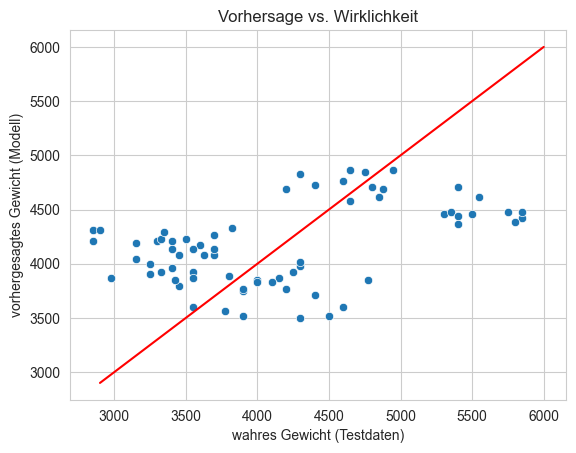

In [57]:
vohersage_bill_depth = model.predict(X_test)
sns.scatterplot(x=y_test, y=vohersage_bill_depth)
plt.plot([2900, 6000], [2900, 6000], color='red')
plt.xlabel('wahres Gewicht (Testdaten)')
plt.ylabel('vorhergesagtes Gewicht (Modell)')
plt.title('Vorhersage vs. Wirklichkeit')
plt.show()

### bill_depth_mm reicht als unabhängige Variable nicht aus, um gute Vorhersage auf das Körpergewicht zu machen.

#### Können wir noch vor jeder Modellbildung sehen, was zusammenhängt?

In [58]:
# Korrelation ist immer zwischen -1 und 1
# und gibt die Stärke des linearen Zusammenhangs an

peng_corrs = penguins.corr(numeric_only=True)
peng_corrs

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


<Axes: >

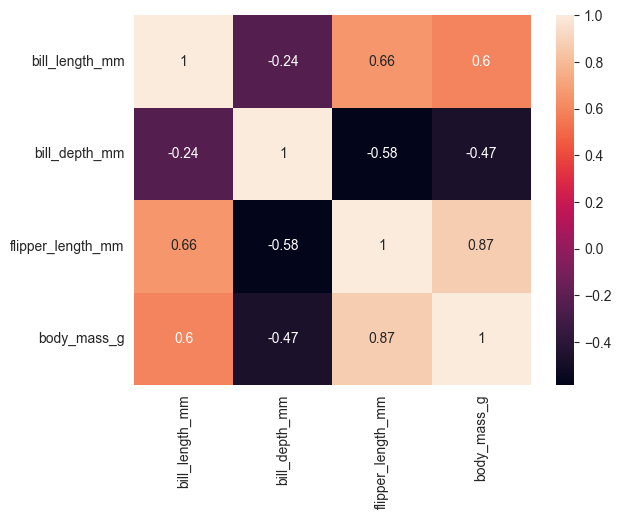

In [59]:
sns.heatmap(peng_corrs, annot=True)

In [60]:
peng_corrs['body_mass_g'].drop('body_mass_g').sort_values(ascending=False)

flipper_length_mm    0.871202
bill_length_mm       0.595110
bill_depth_mm       -0.471916
Name: body_mass_g, dtype: float64

#### Je näher die Werte an der 0 sind, desto schlechter der lineare Zusammenhang. bill_depth und bill_length also beide nicht besonders gut

# Regulierung: Ridge, Lasso, ElasticNet

- Ridge Regression (L2) versucht Problem bei OLS zu lösen: Korrelation zwischen den Variablen. Algorithmus sucht eine Kombination von Koeffizienten, die möglichst nah an Null geht.
- Lasso Regression (L1) versucht, weniger Variablen zu benutzen (Koeffizienten werden auf 0 gesetzt und damit rausgeschmissen)
- ElasticNet ist eine Kombination beider Ansätze

Einführung eines "Strafterms": Parameter mit viel Einfluss werden weiter belohnt, Parameter mit wenig Einfluss werden weiter gesenkt.

In [61]:
# Parameter wählen
X = penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]]
y = penguins["body_mass_g"]

In [62]:
# Daten splitten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Ridge (L2 regularization)
### Parameter Alpha bestimmt die Höhe der Bestrafung
### Höheres Alpha bedeutet höhere Bestrafung, Koeffizienten gehen stärker Richtung 0


In [63]:
# LinearRegression zum Vergleich:
lr = LinearRegression().fit(X_train, y_train)
print("Koeffizienten:", lr.coef_)
print("Score Testdaten:", lr.score(X_test, y_test))

Koeffizienten: [ 4.00878846 10.92455958 48.67371868]
Score Testdaten: 0.7877806019338434


In [64]:
# Modell wählen und mit sehr niedrigem Alpha trainieren
ridge = Ridge(alpha=0.001)
ridge.fit(X_train, y_train)

print("Koeffizienten:", ridge.coef_)
print("Score Testdaten:", ridge.score(X_test, y_test))

Koeffizienten: [ 4.00879252 10.92453632 48.67371487]
Score Testdaten: 0.7877805925478432


In [65]:
# Kleines Alpha:
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)

print("Koeffizienten:", ridge.coef_)
print("Score Testdaten:", ridge.score(X_test, y_test))

Koeffizienten: [ 4.01285159 10.90133458 48.66991764]
Score Testdaten: 0.7877712253610208


In [66]:
# Höheres Alpha
ridge = Ridge(alpha=1000)
ridge.fit(X_train, y_train)

print("Koeffizienten:", ridge.coef_)
print("Score Testdaten:", ridge.score(X_test, y_test))

Koeffizienten: [ 6.13239694  1.82330658 46.54404151]
Score Testdaten: 0.782446835370177


In [67]:
# Extrem hohes Alpha:
ridge = Ridge(alpha=1_000_000)
ridge.fit(X_train, y_train)

print("Koeffizienten:", ridge.coef_)
print("Score Testdaten:", ridge.score(X_test, y_test))

Koeffizienten: [ 0.66921234 -0.19242573  2.51752033]
Score Testdaten: 0.06879019813794784


## Lasso (L1 regularization)
### Parameter Alpha bestimmt die Höhe der Bestrafung
### Höheres Alpha bedeutet höhere Bestrafung, es fallen mehr Variablen komplett aus der Gleichung!
#### Wird gerne eingesetzt, wenn es viele Spalten gibt und nicht viele Zeilen


In [68]:
lasso = Lasso(alpha=10)
lasso.fit(X_train, y_train)

print("Koeffizienten:", lasso.coef_)
print("Score Testdaten:", lasso.score(X_test, y_test))

Koeffizienten: [ 3.98043523  6.8323484  48.30273679]
Score Testdaten: 0.7861612558487447


In [69]:
lasso = Lasso(alpha=100)
lasso.fit(X_train, y_train)

print("Koeffizienten:", lasso.coef_)
print("Score Testdaten:", lasso.score(X_test, y_test))

Koeffizienten: [ 0.79163035  0.         48.12565718]
Score Testdaten: 0.7810809104250762


In [70]:
lasso = Lasso(alpha=200)
lasso.fit(X_train, y_train)

print("Koeffizienten:", lasso.coef_)
print("Score Testdaten:", lasso.score(X_test, y_test))

Koeffizienten: [ 0.          0.         47.82933653]
Score Testdaten: 0.7792718490803782


## ElasticNet
### Parameter Alpha bestimmt die Höhe der Bestrafung
### Höheres Alpha bedeutet höhere Bestrafung, mehr Variablen wandern gegen Null und entfallen teilweise!


In [71]:
# LinearRegression zum Vergleich:
lr = LinearRegression().fit(X_train, y_train)
print("Koeffizienten:", lr.coef_)
print("Score Testdaten:", lr.score(X_test, y_test))

Koeffizienten: [ 4.00878846 10.92455958 48.67371868]
Score Testdaten: 0.7877806019338434


In [72]:
elastic = ElasticNet(alpha=10)
elastic.fit(X_train, y_train)

print("Koeffizienten:", elastic.coef_)
print("Score Testdaten:", elastic.score(X_test, y_test))

Koeffizienten: [ 6.4168448   0.10563    46.01009695]
Score Testdaten: 0.7807989375872945


In [73]:
elastic = ElasticNet(alpha=10_000)
elastic.fit(X_train, y_train)

print("Koeffizienten:", elastic.coef_)
print("Score Testdaten:", elastic.score(X_test, y_test))

Koeffizienten: [ 0.         -0.          0.91588832]
Score Testdaten: 0.016967413606645554
